# TEST TECTCHNIQUE OSC 2024

# 1.Préparation et Exploration des Données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
# importation des donnees
df = pd.read_excel("OnlineRetail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
#taille du jeu de donnees
df.shape

(541909, 8)

In [7]:
# resume du jeu de donnees
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# nombre de valeurs manquantes par colonnes
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# Je separe les variable en variable categorielle et en variable numerique
Numeric_Col=[var for var in df.columns if df[var].dtype != 'O']
Categoric_Col= [var for var in df.columns if df[var].dtype == 'O']

print('Numeric columns : ', Numeric_Col)
print('Categoric columns : ', Categoric_Col)

Numeric columns :  ['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID']
Categoric columns :  ['InvoiceNo', 'StockCode', 'Description', 'Country']


In [10]:
#nous voyons que malgre que customerID prend les valeurs numerique, elle n'est pas une variable numerique 
#et 'InvoiceDate' n'est pas egalement une variable numerique

Numeric_Col.remove('InvoiceDate')
Numeric_Col.remove('CustomerID')

Categoric_Col.append('InvoiceDate')
Categoric_Col.append('CustomerID')

print(Numeric_Col)
print(Categoric_Col)

['Quantity', 'UnitPrice']
['InvoiceNo', 'StockCode', 'Description', 'Country', 'InvoiceDate', 'CustomerID']


In [11]:
#periode de vente 
print(min(df['InvoiceDate']))
print(max(df['InvoiceDate']))

2010-12-01 08:26:00
2011-12-09 12:50:00


les ventes vont du decembre 2010 au 9 decembre 2011

In [12]:
#Nombre total d'article vendu

df['Quantity'].sum()

5176450

In [13]:
# Statistiques descriptives
df.describe().round()

,Quantity,UnitPrice,CustomerID
count,541909.0,541909.0,406829.0
mean,10.0,5.0,15288.0
std,218.0,97.0,1714.0
min,-80995.0,-11062.0,12346.0
25%,1.0,1.0,13953.0
50%,3.0,2.0,15152.0
75%,10.0,4.0,16791.0
max,80995.0,38970.0,18287.0


In [14]:
#les pays 

df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [15]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

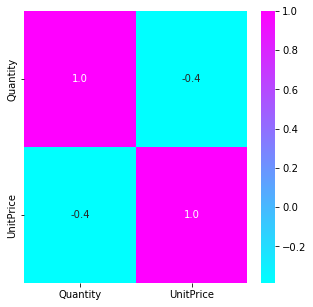

In [16]:
# Heamap de la quantity par le prix unitaire

plt.figure(figsize=(5,5))

sns.heatmap(df[Numeric_Col].corr(method = 'spearman'),
                annot=True, 
                fmt = ".1f", 
                cmap = "cool")
plt.show()

In [34]:
# ventes totales par produit

sales_by_product = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False)

#  les 20 produits les plus vendus en terme de chiffre d'affaire
top_10_products = sales_by_product.head(20)
print(top_10_products)

Description
REGENCY CAKESTAND 3 TIER              132870.40
WHITE HANGING HEART T-LIGHT HOLDER     93823.85
JUMBO BAG RED RETROSPOT                83236.76
PARTY BUNTING                          67687.53
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56499.22
RABBIT NIGHT LIGHT                     51137.80
CHILLI LIGHTS                          45936.81
PAPER CHAIN KIT 50'S CHRISTMAS         41500.48
PICNIC BASKET WICKER 60 PIECES         39619.50
BLACK RECORD COVER FRAME               39009.38
JUMBO BAG PINK POLKADOT                36473.01
SPOTTY BUNTING                         35056.44
DOORMAT KEEP CALM AND COME IN          34312.60
WOOD BLACK BOARD ANT WHITE FINISH      34307.06
SET OF 3 CAKE TINS PANTRY DESIGN       32607.80
JAM MAKING SET WITH JARS               31658.47
JUMBO BAG STRAWBERRY                   30195.71
HEART OF WICKER LARGE                  28331.45
VICTORIAN GLASS HANGING T-LIGHT        28152.86
Name: TotalSales, dtype: flo

In [18]:
#determiner les produit les plus vendu par pays en terme de chiffre d'affaire et non en nombre d'article



# Remplacer les valeurs manquantes dans 'Description' par 'Unknown'
df['Description'].fillna('Unknown', inplace=True)

# Supprimer les lignes avec des valeurs manquantes dans 'CustomerID'
df.dropna(subset=['CustomerID'], inplace=True)

#  ventes totales par produit
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Grouper par pays et description de produit
sales_by_country_product = df.groupby(['Country', 'Description'])['TotalSales'].sum().reset_index()

#  produit le plus vendu dans chaque pays
top_product_by_country = sales_by_country_product.loc[sales_by_country_product.groupby('Country')['TotalSales'].idxmax()]


print(top_product_by_country)

                    Country                          Description  TotalSales
377               Australia                   RABBIT NIGHT LIGHT     3375.84
812                 Austria                              POSTAGE     1456.00
921                 Bahrain           ICE CREAM SUNDAE LIP GLOSS      120.00
1409                Belgium                              POSTAGE     4248.00
1742                 Brazil             REGENCY CAKESTAND 3 TIER      175.20
1835                 Canada                              POSTAGE      550.94
2209        Channel Islands             REGENCY CAKESTAND 3 TIER      517.80
2696                 Cyprus   RUSTIC  SEVENTEEN DRAWER SIDEBOARD      580.00
2847         Czech Republic  ROUND SNACK BOXES SET OF4 WOODLAND        70.80
3018                Denmark                   RED KITCHEN SCALES      734.40
4517                   EIRE             REGENCY CAKESTAND 3 TIER     6987.15
5131     European Community                              POSTAGE      141.00

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# 2.Analyse Exploratoire des Données (EDA)

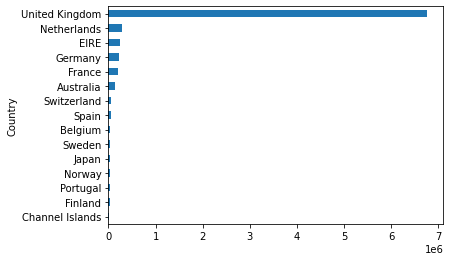

In [20]:
# 15 premiers pays ayant realises les ventes les plus importantes
r = df.groupby('Country')['TotalSales'].sum().sort_values().tail(15)
r.plot(kind="barh")

plt.show()

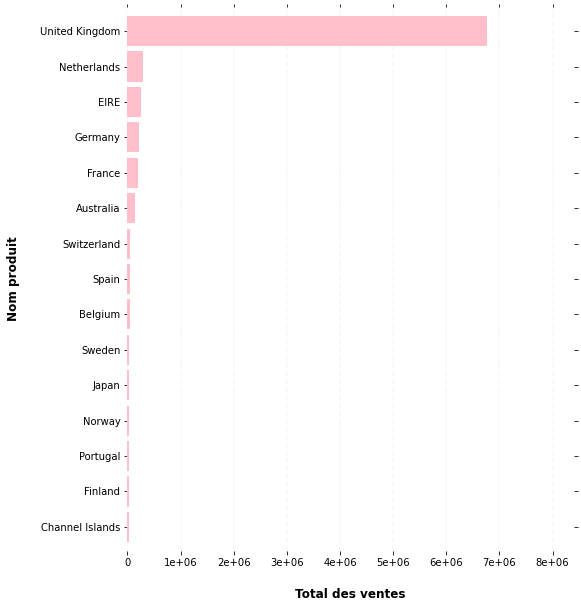

In [25]:
# Pour une moeilleure des 15 premiers pays ayant realises les ventes les plus importantes 

from matplotlib.ticker import StrMethodFormatter
ax = r.plot(kind='barh', figsize=(8, 10), color='pink', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

  # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Set x-axis label
ax.set_xlabel("Total des ventes", labelpad=20, weight='bold', size=12)

  # Set y-axis label
ax.set_ylabel("Nom produit", labelpad=20, weight='bold', size=12)

  # Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

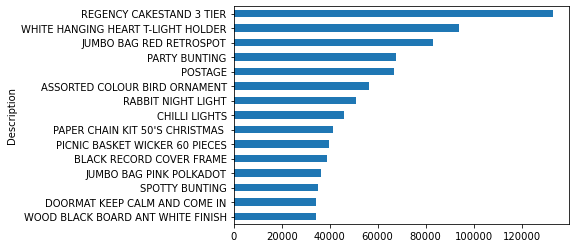

In [22]:
#les 15 premiers produits les plus vendus
rp = df.groupby('Description')['TotalSales'].sum().sort_values().tail(15)
rp.plot(kind="barh")

plt.show()

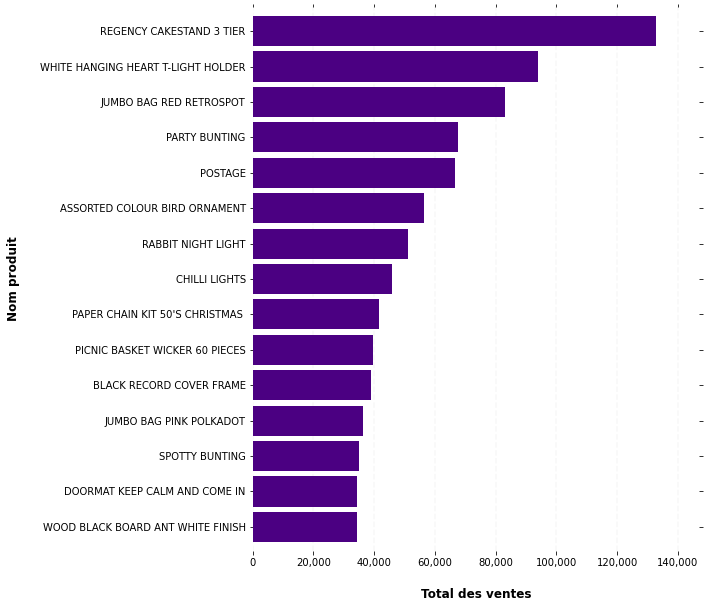

In [23]:
# Pour une moeilleure visualisation des 15 produits  nous pouvons utiliser 

from matplotlib.ticker import StrMethodFormatter
ax = rp.plot(kind='barh', figsize=(8, 10), color='indigo', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

  # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Set x-axis label
ax.set_xlabel("Total des ventes", labelpad=20, weight='bold', size=12)

  # Set y-axis label
ax.set_ylabel("Nom produit", labelpad=20, weight='bold', size=12)

  # Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

evolution des ventes par semaines . On remarque des ventes elevees en fin d annees

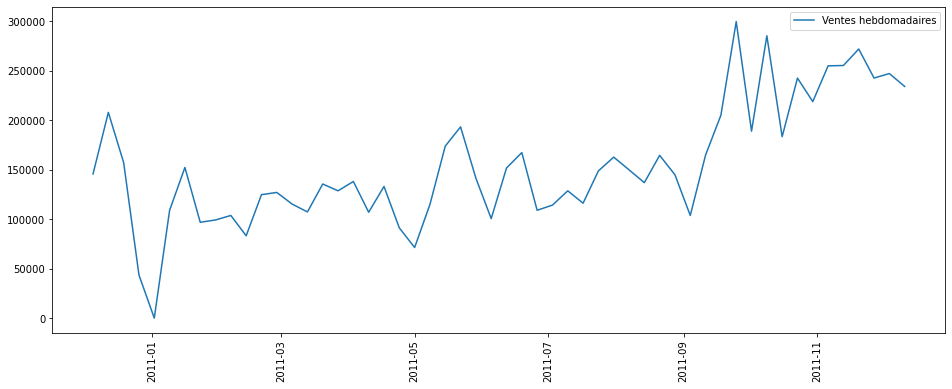

In [32]:
df_sales = df[['InvoiceDate','TotalSales']].set_index('InvoiceDate')
df_week = df_sales.resample(rule = 'w').sum() #m pour designer le mois nous aurions aussi pu visualiser pour la semaine

plt.figure(figsize = (16,6))
plt.plot(df_week, label = "Ventes hebdomadaires")
plt.xticks(rotation = "vertical")
plt.legend()
plt.show()

In [52]:
# Calculer les ventes totales par produit

sales_by_product = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False)

# Afficher les 10 produits les plus vendus
top_10_products = sales_by_product.head(10)
print(top_10_products)

Description
REGENCY CAKESTAND 3 TIER              132870.40
WHITE HANGING HEART T-LIGHT HOLDER     93823.85
JUMBO BAG RED RETROSPOT                83236.76
PARTY BUNTING                          67687.53
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56499.22
RABBIT NIGHT LIGHT                     51137.80
CHILLI LIGHTS                          45936.81
PAPER CHAIN KIT 50'S CHRISTMAS         41500.48
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: TotalSales, dtype: float64


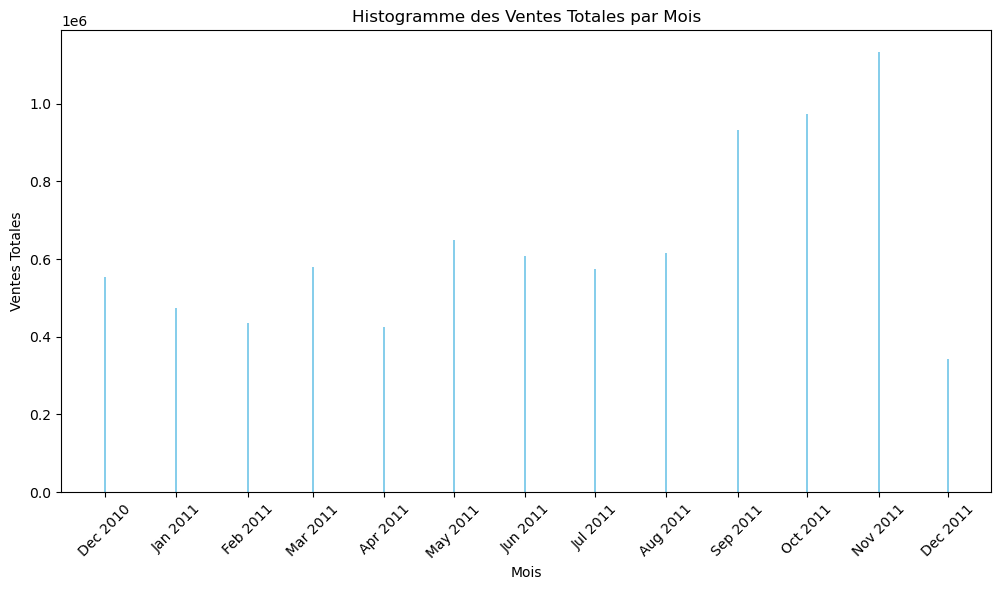

In [51]:
# Extraire le mois de la date de facturation
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Grouper les ventes totales par mois
monthly_sales = df.groupby('InvoiceMonth')['TotalSales'].sum().reset_index()

# Convertir 'InvoiceMonth' en datetime pour faciliter la visualisation
monthly_sales['InvoiceMonth'] = monthly_sales['InvoiceMonth'].dt.to_timestamp()

# Tracer un histogramme des ventes par mois
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['InvoiceMonth'], monthly_sales['TotalSales'], color='skyblue')
plt.xlabel('Mois')
plt.ylabel('Ventes Totales')
plt.title('Histogramme des Ventes Totales par Mois')
plt.xticks(monthly_sales['InvoiceMonth'], monthly_sales['InvoiceMonth'].dt.strftime('%b %Y'), rotation=45)
plt.show()

on constate que le mois de novembre a enregistre les plus grandes ventes

In [58]:
# les cinq meilleurs clients pour chaque pays


#  ventes totales pour chaque client dans chaque pays
customer_sales = df.groupby(['Country', 'CustomerID'])['TotalSales'].sum().reset_index()

# les cinq meilleurs clients pour chaque pays
top_customers_per_country = customer_sales.sort_values(['Country', 'TotalSales'], ascending=[True, False])\
                                          .groupby('Country').head(5)


print(top_customers_per_country)

             Country  CustomerID  TotalSales
3          Australia     12415.0   123725.45
6          Australia     12431.0     5443.61
1          Australia     12388.0     2780.66
5          Australia     12424.0     1760.96
2          Australia     12393.0     1582.60
...              ...         ...         ...
1051  United Kingdom     13694.0    62653.10
4379     Unspecified     16320.0     1038.46
4376     Unspecified     12363.0      552.00
4377     Unspecified     12743.0      546.43
4378     Unspecified     14265.0      530.18

[133 rows x 3 columns]


Text(0, 0.5, 'Nombre de transactions')

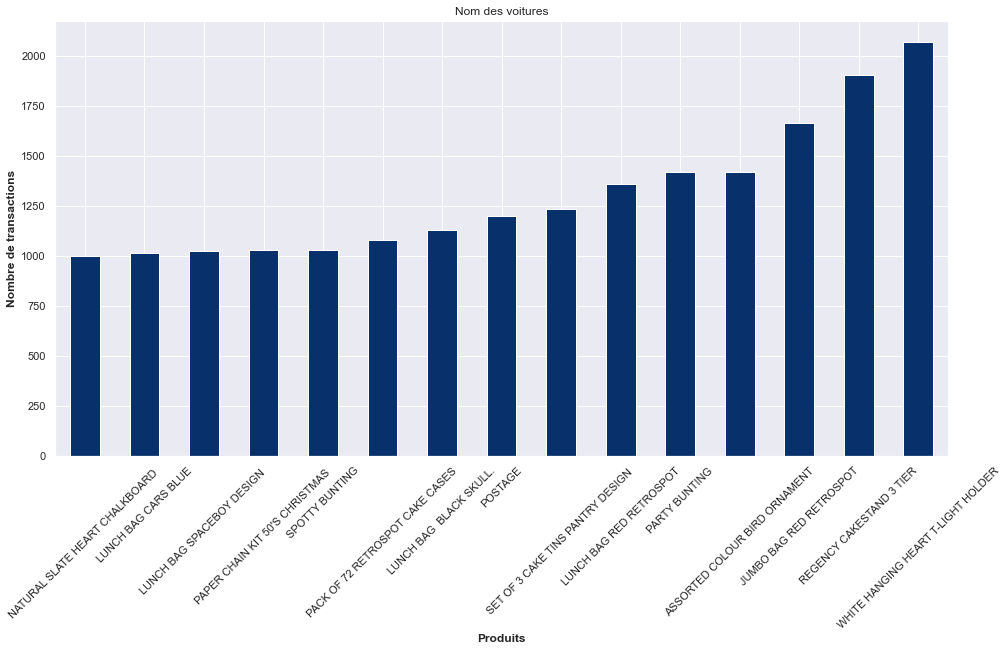

In [33]:
import seaborn as sns # importer Seaborn sous le nom de sns
sns.set() # écraser l’aspect ‘matplotlib’

plt.rcParams['figure.figsize']=[16,8] 
#spécifier l'axe des x et l'axe des y
ax = df['Description'].value_counts().sort_values(ascending = True).tail(15).plot(
    kind='bar', # Pour créer un graphique à barres avec matplotlib, vous pouvez utiliser la fonction 'bar' ou barh .stacked=True, 
    figsize=(16,8),# déterminer la taille du graphique
    colormap='Blues_r', # la couleur des barres
    rot=45 # faire pivoter les étiquettes pour l'axe des x a 45 degre
    )
ax.title.set_text('Nom des voitures') # Donner un nom au graphique
plt.xlabel('Produits', fontweight ='bold') # Preciser le nom de l'axe des x et mettre en gras le text
plt.ylabel('Nombre de transactions', fontweight ='bold') # Preciser le nom de l'axe des y et mettre en gras le text

### Modelisation

In [64]:
# Extraire la date et les autres caractéristiques temporelles
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Weekday'] = df['InvoiceDate'].dt.weekday
df['Hour'] = df['InvoiceDate'].dt.hour



In [65]:
# Encoder la variable 'Country' en utilisant l'encodage one-hot
df = pd.get_dummies(df, columns=['Country'])



In [66]:
# Sélection des caractéristiques et de la cible
features = ['Year', 'Month', 'Day', 'Weekday', 'Hour', 'Quantity'] + [col for col in df.columns if col.startswith('Country_')]
X = df[features]
y = df['TotalSales']



In [67]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [68]:
# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [69]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)



In [70]:
# Évaluer le modèle
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 14.22591830519492
Mean Squared Error: 4299.5646860593715
Root Mean Squared Error: 65.57106592132975
